# Necessary Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#load the datasets
train_df = pd.read_excel("train_data.xlsx")
test_df =  pd.read_excel("test_points.xlsx")   

train_df.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.93911,67.709953,NaN,3.779217
1,41.15330,20.168300,NaN,1.077234
2,28.03390,1.659600,NaN,2.536905
3,42.50630,1.521800,165.0,0.345543
4,-11.20270,17.873900,NaN,1.836434


In [3]:
#print max and min values of every feature and label
print("max latitude : ",train_df['Lat'].max())
print("min latitude : ",train_df['Lat'].min())

print("max longitude : ",train_df['Long_'].max())
print("min longitude : ",train_df['Long_'].min())

print("death toll max : ",train_df['Deaths'].max())
print("death toll min : ",train_df['Deaths'].min())

print("max cfr : ",train_df['Case_Fatality_Ratio'].max())
print("min cfr : ",train_df['Case_Fatality_Ratio'].min())

max latitude :  71.7069
min latitude :  -71.9499
max longitude :  178.065
min longitude :  -178.1165
death toll max :  200.0
death toll min :  0.0
max cfr :  7570.76923076923
min cfr :  0.0


## Scatter Plot 
Visualize how deaths are distributed geographically.

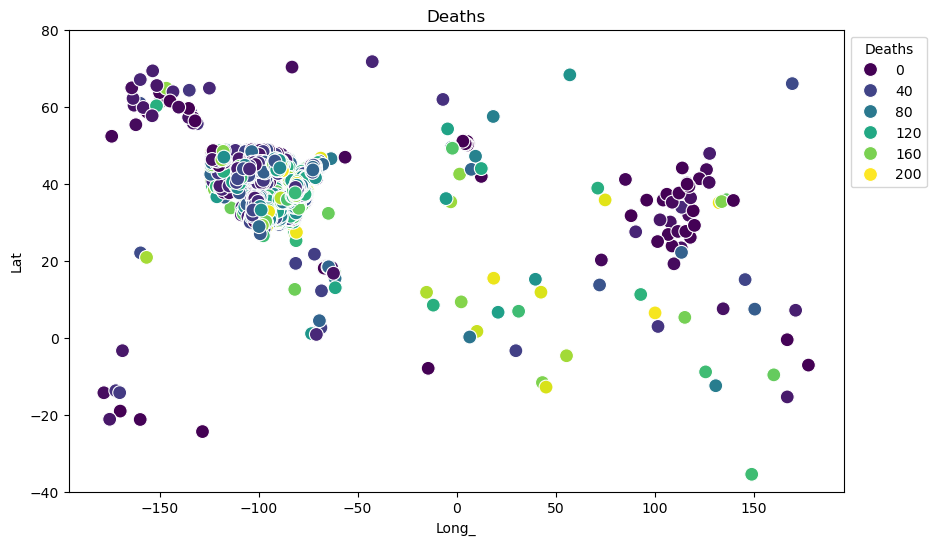

In [4]:
#drop the columns where deaths , latitude and longitude are null
dll_train_df = train_df.dropna(subset=['Deaths', 'Lat', 'Long_'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Long_', y='Lat', data=dll_train_df, hue='Deaths', palette='viridis', s=100)
plt.title('Deaths')
plt.xlabel('Long_')
plt.ylabel('Lat')

plt.ylim(-40, +80)
plt.legend(title='Deaths', bbox_to_anchor=(1, 1))
plt.show()


## Heatmap spatial density of deaths
It  Identify hotspots where deaths are concentrated. 

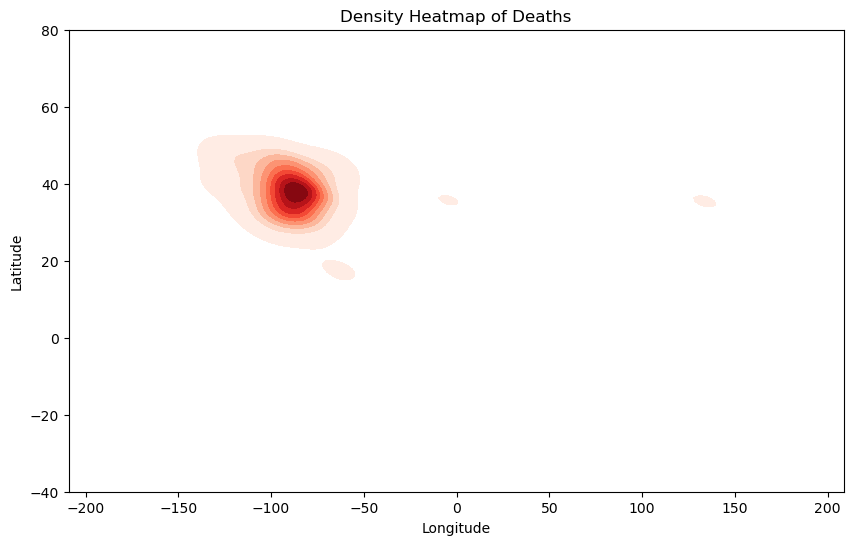

In [5]:

plt.figure(figsize=(10, 6))
sns.kdeplot(x='Long_', y='Lat', weights='Deaths', data=dll_train_df, cmap='Reds', fill=True, alpha=1)
plt.title('Density Heatmap of Deaths')
plt.ylim(-40, +80)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


###  Histogram/Distribution Plot (Distribution of Deaths)
Examine the distribution of deaths.

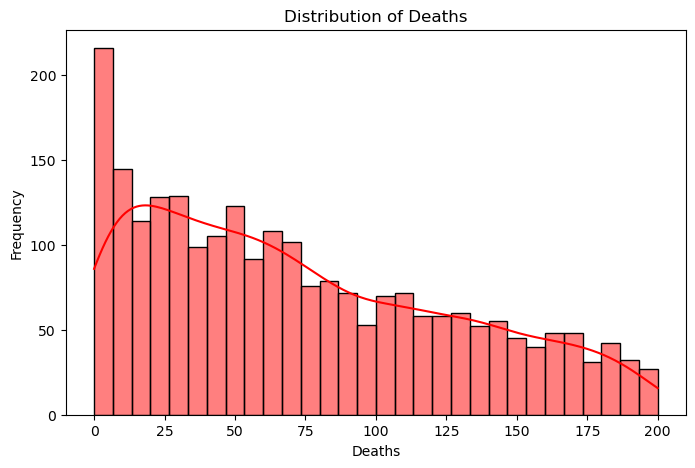

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(dll_train_df['Deaths'], kde=True, bins=30, color='red')
plt.title('Distribution of Deaths')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.show()


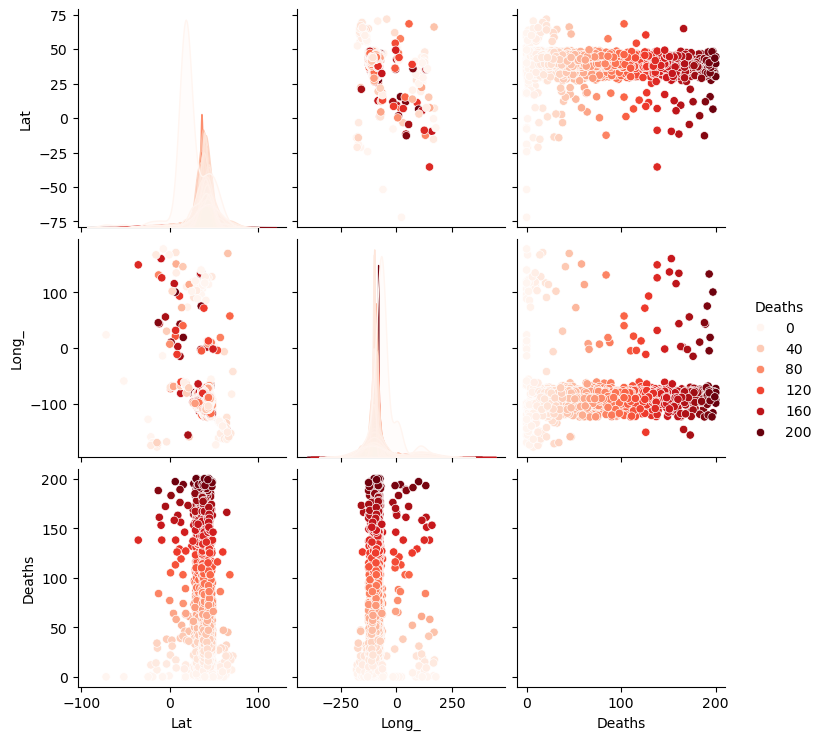

In [7]:
# Explore pairwise relationships among latitude, longitude, and deaths
sns.pairplot(dll_train_df, vars=['Lat', 'Long_', 'Deaths'], diag_kind='kde', hue='Deaths', palette='Reds')
plt.show()


### Scatter Plot (Spatial Distribution with CFR)
Show geographic distribution of deaths and how it relates to the CFR.

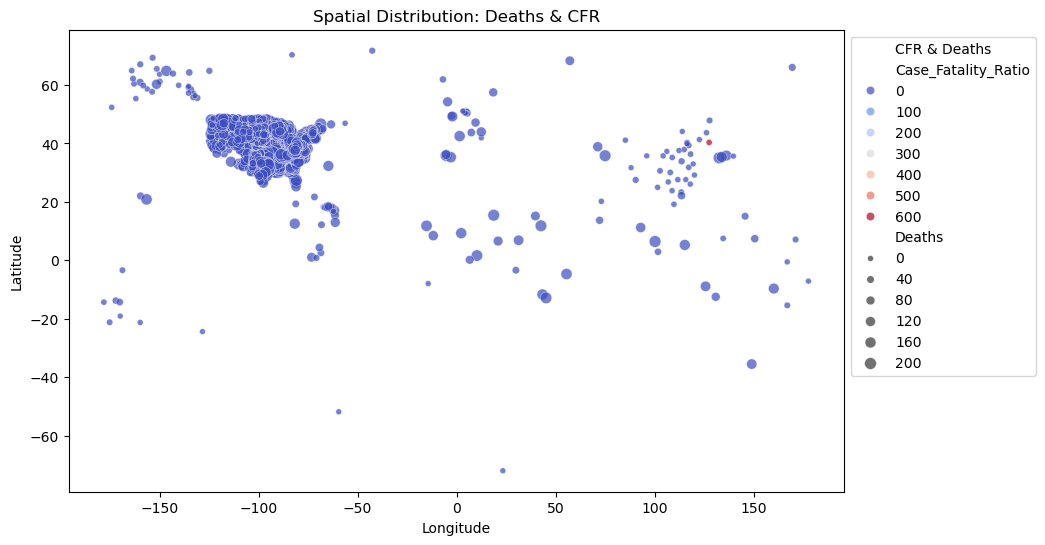

In [8]:
cdll_train_df = train_df.dropna(subset=['Case_Fatality_Ratio','Deaths', 'Lat', 'Long_'])
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Long_', y='Lat', 
    size='Deaths', hue='Case_Fatality_Ratio', 
    data=cdll_train_df, palette='coolwarm', alpha=0.7
)
plt.title('Spatial Distribution: Deaths & CFR')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='CFR & Deaths', bbox_to_anchor=(1, 1))
plt.show()


### Heatmap (CFR Spatial Density)
Identify regions with high/low CFR values.

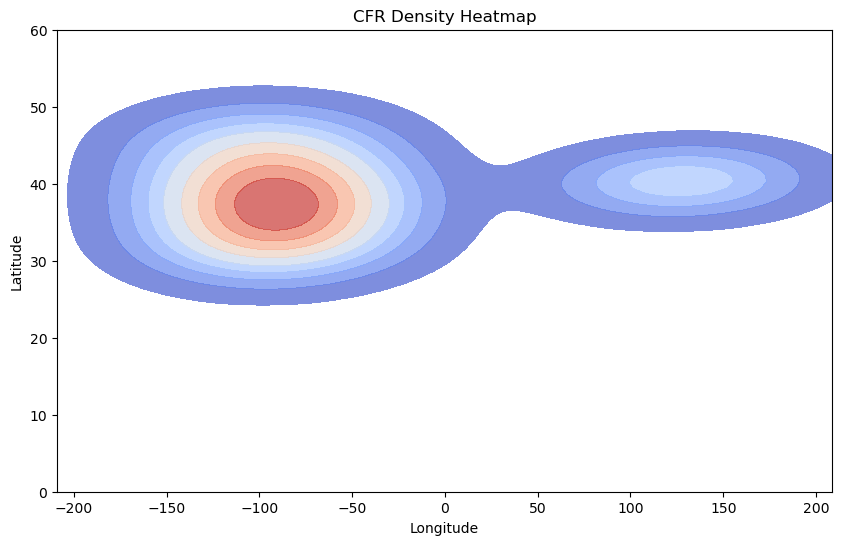

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x='Long_', y='Lat', weights='Case_Fatality_Ratio', 
    data=cdll_train_df, cmap='coolwarm', fill=True, alpha=0.7
)
plt.ylim(0,60)
plt.title('CFR Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


###  Scatter Plot (Deaths vs CFR)
See the relationship between deaths and CFR.

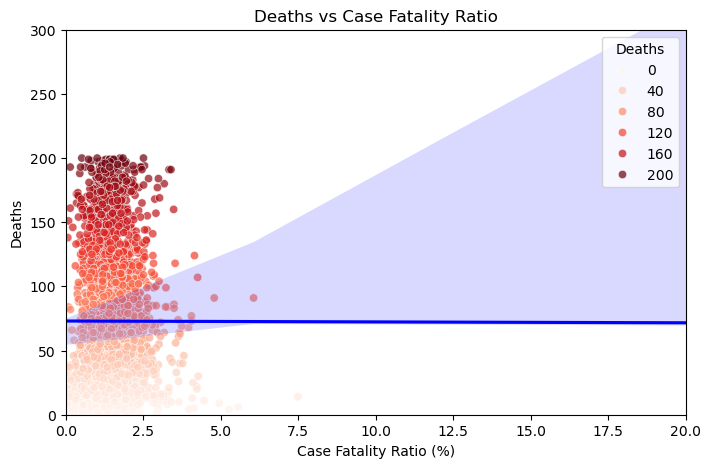

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Case_Fatality_Ratio', y='Deaths', data=cdll_train_df, hue='Deaths', palette='Reds', alpha=0.7)
sns.regplot(x='Case_Fatality_Ratio', y='Deaths', data=cdll_train_df, scatter=False, color='blue')
plt.title('Deaths vs Case Fatality Ratio')
plt.xlabel('Case Fatality Ratio (%)')
plt.xlim(0, 20)
plt.ylim(0, 300)
plt.ylabel('Deaths')
plt.show()


### Pairplot 
Visualize relationships among latitude, longitude, deaths, and Case_Fatality_Ratio

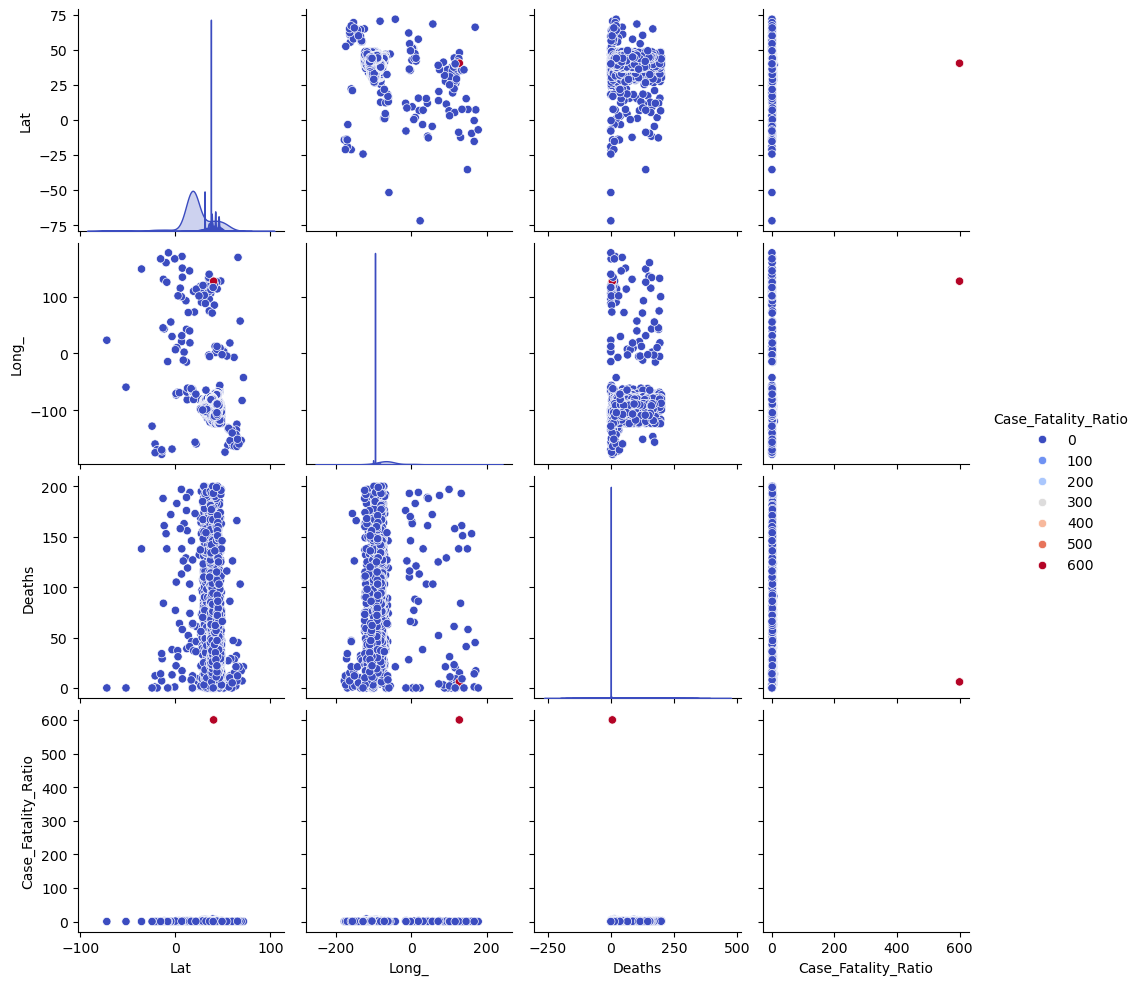

In [11]:
sns.pairplot(cdll_train_df, vars=['Lat', 'Long_', 'Deaths', 'Case_Fatality_Ratio'], hue='Case_Fatality_Ratio', palette='coolwarm', diag_kind='kde')
plt.show()


# KNN Imputer
The KNN Imputer is a sophisticated technique used for handling missing data in machine learning and data science. It operates by filling in missing values based on the values of the nearest neighbors in the dataset

In [12]:
# KNN imputer for missing values of deaths
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
train_df['KNN_Deaths'] = imputer.fit_transform(train_df[['Deaths']])

In [13]:
train_df = train_df.dropna()

In [51]:
from sklearn.preprocessing import StandardScaler

# Combine coordinates into a 2D array
coordinates = train_df[['Lat', 'Long_']]

# Create and fit scaler ONCE on both features
scaler = StandardScaler()
scaled_coords = scaler.fit_transform(coordinates)

# Store scaled values back in DataFrame
train_df['Lat'] = scaled_coords[:, 0]  # First column (latitude)
train_df['Long_'] = scaled_coords[:, 1]  # Second column (longitude)

train_df.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,KNN_Deaths
3,0.550901,2.311982,165.0,0.345543,165.0
5,-11.655874,2.890707,0.0,0.000000,0.0
6,-2.162867,0.633011,146.0,1.603338,146.0
9,-7.765659,6.222901,138.0,0.061360,138.0
11,-5.311628,5.741183,84.0,0.081552,84.0


In [36]:
#drop the rows where Lat or Long_ or Case_Fatality_Ratio is NaN
train_df = train_df.dropna(subset=['Lat', 'Long_', 'Case_Fatality_Ratio'])
train_df.head()

#total Nan values in the dataset
train_df.isnull().sum()

Lat                    0
Long_                  0
Deaths                 0
Case_Fatality_Ratio    0
KNN_Deaths             0
dtype: int64

In [37]:
#prepare X and y
X = train_df[['Lat', 'Long_']]
y = train_df['Case_Fatality_Ratio']

y_d = train_df['Deaths']


#remove nan values from test data
test_df = test_df.dropna(subset=['Lat', 'Long_'])
test_df.head()

,Lat,Long_
0,41.1533,20.1683
1,-71.9499,23.3470
2,-35.4735,149.0124
3,-34.9285,138.6007
4,47.5162,14.5501


In [38]:
#train Linear Regression model with K fold cross validation and loss is RMSE from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
scores = cross_val_score(linear_regression_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print('RMSE:', -scores.mean())

#train the model
linear_regression_model.fit(X, y)

linear_regression_model_for_deaths = LinearRegression()
scores = cross_val_score(linear_regression_model_for_deaths, X, y_d, cv=5, scoring='neg_root_mean_squared_error')
print('RMSE:', -scores.mean())

#train the model
linear_regression_model_for_deaths.fit(X, y_d)

#save the model
import pickle
filename = 'saved_models/deaths/linear_reg.pkl'
pickle.dump(linear_regression_model_for_deaths, open(filename, 'wb'))

filename = 'saved_models/cfr/linear_reg.pkl'
pickle.dump(linear_regression_model, open(filename, 'wb'))





RMSE: 6.344918466703929
RMSE: 58.064624544639045


In [39]:
#train random forest model with K fold cross validation and loss is RMSE
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print('RMSE:', -scores.mean())
print('MSE:', -scores.mean())
#train the model
random_forest_model.fit(X, y)

random_forest_model_for_deaths = RandomForestRegressor()
scores = cross_val_score(random_forest_model_for_deaths, X, y_d, cv=5, scoring='neg_root_mean_squared_error')
print('RMSE for Deaths:', -scores.mean())
print('MSE for Deaths:', -scores.mean())
#train the model
random_forest_model_for_deaths.fit(X, y_d)

#save the model
filename = 'saved_models/deaths/random_forest.pkl'
pickle.dump(random_forest_model_for_deaths, open(filename, 'wb'))

filename = 'saved_models/cfr/random_forest.pkl'
pickle.dump(random_forest_model, open(filename, 'wb'))




RMSE: 6.076970466344154
MSE: 6.076970466344154
RMSE for Deaths: 55.36008538822118
MSE for Deaths: 55.36008538822118


In [41]:
#train Gradient Boosting model with K fold cross validation and loss is MSE
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting_model = GradientBoostingRegressor()
scores = cross_val_score(gradient_boosting_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print('MSE:', -scores.mean())

#train the model
gradient_boosting_model.fit(X, y)

gradient_boosting_model_for_deaths = GradientBoostingRegressor()
scores = cross_val_score(gradient_boosting_model_for_deaths, X, y_d, cv=5, scoring='neg_mean_squared_error')
print(scores)
print('MSE for Deaths:', -scores.mean())
#train the model
gradient_boosting_model_for_deaths.fit(X, y_d)


#save the model
filename = 'saved_models/deaths/gradient_boost.pkl'
pickle.dump(gradient_boosting_model_for_deaths, open(filename, 'wb'))

filename = 'saved_models/cfr/gradient_boost.pkl'
pickle.dump(gradient_boosting_model, open(filename, 'wb'))






[-7.55542785e+02 -2.73889346e-01 -6.43303784e-01 -4.02133443e-01
 -4.70243791e-01]
MSE: 151.46647100811285
[-3733.59583139 -2219.9386419  -2148.23720173 -2783.30859287
 -2869.30482307]
MSE for Deaths: 2750.8770181923965


In [40]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define the XGBoost regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=20,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=4,
    gamma=0.5,
    alpha=0.5,

)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metric (negative MSE for compatibility with scikit-learn)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring=mse_scorer)

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-cv_scores)

# Print results
print(f"RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Standard Deviation RMSE: {np.std(rmse_scores):.4f}")

#train the model
xgb_model.fit(X, y)

xgb_model_for_deaths = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=20,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=4,
    gamma=0.5,
    alpha=0.5,

)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metric (negative MSE for compatibility with scikit-learn)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model_for_deaths, X, y_d, cv=kf, scoring=mse_scorer)

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-cv_scores)

# Print results
print(f"RMSE Scores for Deaths: {rmse_scores}")
print(f"Mean RMSE for Deaths: {np.mean(rmse_scores):.4f}")
print(f"Standard Deviation RMSE for Deaths: {np.std(rmse_scores):.4f}")

#train the model
xgb_model_for_deaths.fit(X, y_d)


#save the model
filename = 'saved_models/deaths/xgb.pkl'
pickle.dump(xgb_model_for_deaths, open(filename, 'wb'))

filename = 'saved_models/cfr/xgb.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))








RMSE Scores: [ 5.26049854  8.94682506 27.52440445  7.04740975  9.70494138]
Mean RMSE: 11.6968
Standard Deviation RMSE: 8.0633
RMSE Scores for Deaths: [50.66585155 52.48722758 54.23089461 53.7377722  52.23849217]
Mean RMSE for Deaths: 52.6720
Standard Deviation RMSE for Deaths: 1.2500


In [42]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define the LightGBM regressor
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8
)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metric (negative MSE for compatibility with scikit-learn)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(lgb_model, X, y, cv=kf, scoring=mse_scorer)

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-cv_scores)

# Print results
print(f"RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Standard Deviation RMSE: {np.std(rmse_scores):.4f}")

#train the model
lgb_model.fit(X, y)

lgb_model_for_deaths = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8
)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metric (negative MSE for compatibility with scikit-learn)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(lgb_model_for_deaths, X, y_d, cv=kf, scoring=mse_scorer)

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-cv_scores)

# Print results
print(f"RMSE Scores for Deaths: {rmse_scores}")
print(f"Mean RMSE for Deaths: {np.mean(rmse_scores):.4f}")
print(f"Standard Deviation RMSE for Deaths: {np.std(rmse_scores):.4f}")

#train the model
lgb_model_for_deaths.fit(X, y_d)


#save the model
filename =  'saved_models/deaths/lgbm.pkl'
pickle.dump(lgb_model_for_deaths, open(filename, 'wb'))

filename = 'saved_models/cfr/lgbm.pkl'
pickle.dump(lgb_model, open(filename, 'wb'))



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1900, number of used features: 2
[LightGBM] [Info] Start training from score 1.706317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1901, number of used features: 2
[LightGBM] [Info] Start training from score 1.686265
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1901,

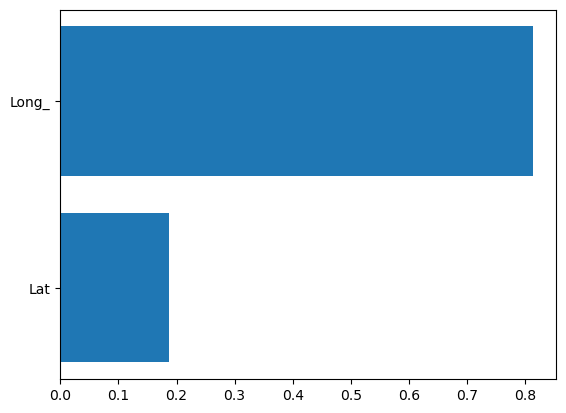

In [43]:
# feature importance
importances = random_forest_model.feature_importances_
plt.barh(range(X.shape[1]), importances)
plt.yticks(range(X.shape[1]), X.columns)
plt.show()



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1900, number of used features: 2
[LightGBM] [Info] Start training from score 1.401849
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1901, number of used features: 2
[LightGBM] [Info] Start training from score 1.693832
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1901, number of used features: 2
[LightGBM] [Info] Start training fro

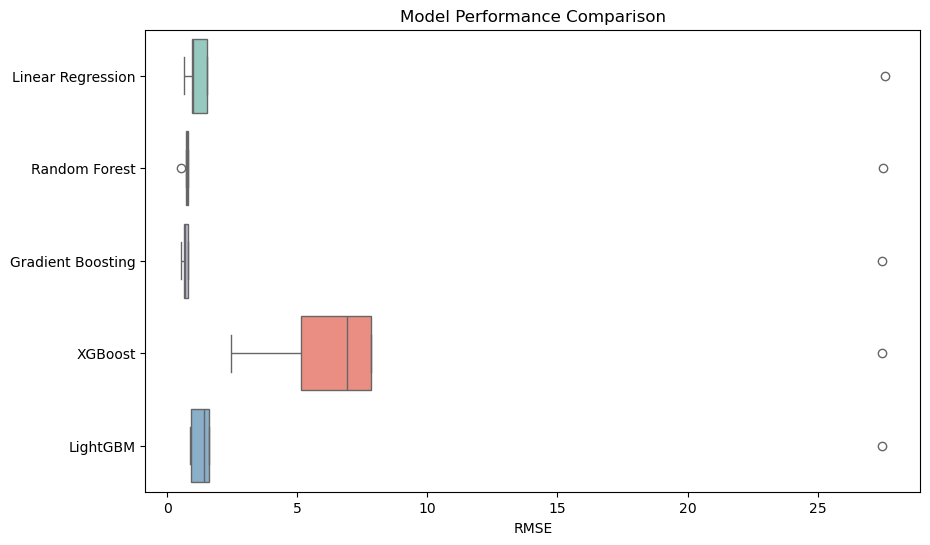

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1900, number of used features: 2
[LightGBM] [Info] Start training from score 73.058421
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1901, number of used features: 2
[LightGBM] [Info] Start training from score 71.464492
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1901, number of used features: 2
[LightGBM] [Info] Start training f

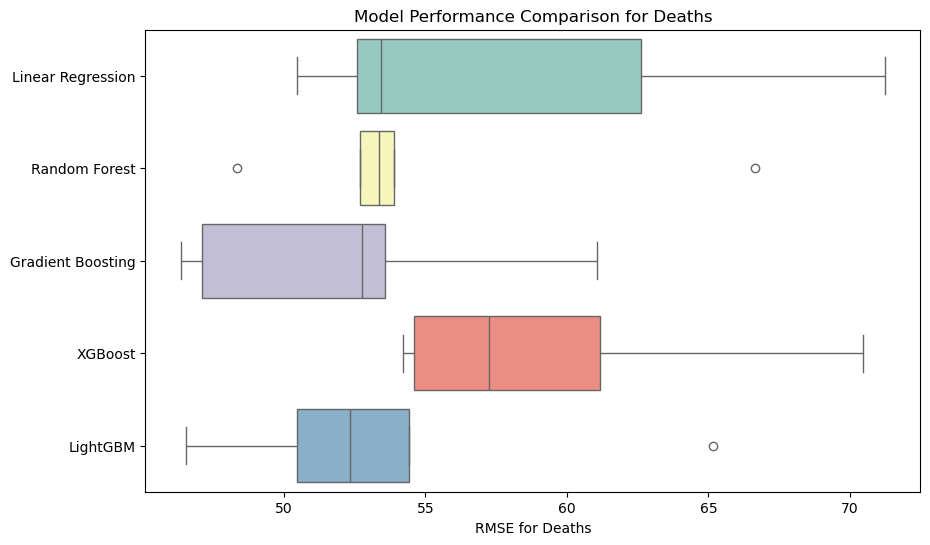

In [44]:
#heatmap of performance of different models
import seaborn as sns
import numpy as np

# Define the models
models = {
    'Linear Regression': linear_regression_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}

models_for_deaths = {
    'Linear Regression': linear_regression_model_for_deaths,
    'Random Forest': random_forest_model_for_deaths,
    'Gradient Boosting': gradient_boosting_model_for_deaths,
    'XGBoost': xgb_model_for_deaths,
    'LightGBM': lgb_model_for_deaths
}



# Create an empty dictionary to store the results
results = {}

results_for_deaths = {}


# Evaluate each model in turn
for label, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    # Convert negative MSE to RMSE
    rmse_scores = np.sqrt(-scores)
    # Store the results
    results[label] = rmse_scores

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, orient='h', palette='Set3')
plt.xlabel('RMSE')
plt.title('Model Performance Comparison')
plt.show()


# Evaluate each model in turn
for label, model in models_for_deaths.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, y_d, cv=5, scoring='neg_mean_squared_error')
    # Convert negative MSE to RMSE
    rmse_scores = np.sqrt(-scores)
    # Store the results
    results_for_deaths[label] = rmse_scores

# Convert the results to a DataFrame
results_df_for_deaths = pd.DataFrame(results_for_deaths)

# Plot the results
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df_for_deaths, orient='h', palette='Set3')
plt.xlabel('RMSE for Deaths')
plt.title('Model Performance Comparison for Deaths')
plt.show()


In [52]:
#predict the Case_Fatality_Ratio and Deaths for test data save diffrent files for diffrent models
#dropna of test data
test_df = test_df.dropna()

#scale the test data
test_df[['Lat', 'Long_']] = scaler.transform(test_df[['Lat', 'Long_']])
test_df.head()


test_df['Case_Fatality_Ratio'] = linear_regression_model.predict(test_df[['Lat', 'Long_']])
test_df['Deaths'] = linear_regression_model_for_deaths.predict(test_df[['Lat', 'Long_']])
test_df.to_excel('test_data_linear_regression.xlsx', index=False)

test_df['Case_Fatality_Ratio'] = random_forest_model.predict(test_df[['Lat', 'Long_']])
test_df['Deaths'] = random_forest_model_for_deaths.predict(test_df[['Lat', 'Long_']])
test_df.to_excel('test_data_random_forest.xlsx', index=False)

test_df['Case_Fatality_Ratio'] = gradient_boosting_model.predict(test_df[['Lat', 'Long_']])
test_df['Deaths'] = gradient_boosting_model_for_deaths.predict(test_df[['Lat', 'Long_']])
test_df.to_excel('test_data_gradient_boosting.xlsx', index=False)

test_df['Case_Fatality_Ratio'] = xgb_model.predict(test_df[['Lat', 'Long_']])
test_df['Deaths'] = xgb_model_for_deaths.predict(test_df[['Lat', 'Long_']])
test_df.to_excel('test_data_xgboost.xlsx', index=False)

test_df['Case_Fatality_Ratio'] = lgb_model.predict(test_df[['Lat', 'Long_']])
test_df['Deaths'] = lgb_model_for_deaths.predict(test_df[['Lat', 'Long_']])
test_df.to_excel('test_data_lightgbm.xlsx', index=False)



In [53]:
#save scaler
folder1 = 'saved_models/deaths/'
folder2 = 'saved_models/cfr/'

m1 = 'linear_reg_'
m2 = 'random_forest_'
m3 = 'gradient_boost_'
m4 = 'xgb_'
m5 = 'lgbm_'

#save
filename = folder1 + m1 + 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = folder1 + m2 + 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = folder1 + m3 + 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = folder1 + m4 + 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = folder1 + m5 + 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = folder2 + m1 + 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = folder2 + m2 + 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = folder2 + m3 + 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = folder2 + m4 + 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = folder2 + m5 + 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))


In [54]:
#load scalar

filename = folder1 + m1 + 'scaler.pkl'
scaler = pickle.load(open(filename, 'rb'))

input_data = np.array([[10.0, 20.0]])
input_data = scaler.transform(input_data)

print(input_data)

[[10. 20.]]


/home/kunalkushwahatg/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
scaler = pickle.load(open(filename, 'rb'))
